# Introduction to matplotlib
Matplotlib is a plotting library in Python. In this notebook we will go over some of the fundamentals of Matplotlib and make 

## Why bother
Even though Matplotibs API isn't the most intuitive and pretty API we can think of for plotting, it is used so broadly that there is a good chance you will encounter it often throughout your career. 

Matplotlib has two main user interfaces: `pyplot` and the `object-oriented` interface. The `pyplot` module contains functions that allow you to generate many kinds of plots quickly, but for more control over the way your plots look, it is typically better to use the objec-oriented interface. 

For now we start with `pyplot`. It is simple enough to create a line chart of some numbers and add some information around it.

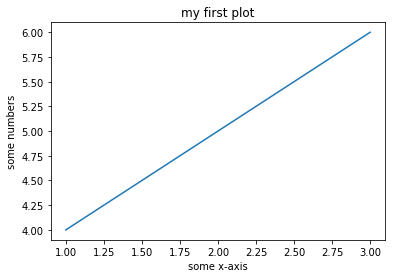

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([1, 2, 3], [4, 5, 6])
plt.ylabel('some numbers')
plt.xlabel('some x-axis')
_  = plt.title('my first plot')


For every x-y pair we can also set the desired style:

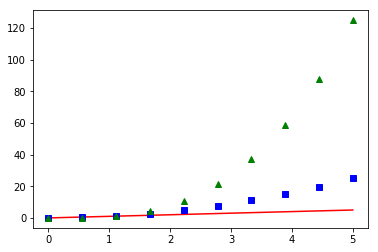

In [20]:
t = np.linspace(0, 5, 10)
_ = plt.plot(t, t, 'r-', t, t**2, 'bs', t, t**3, 'g^')

We often have data structures for which we can access the values by string identifiers, such as pandas data frames. 


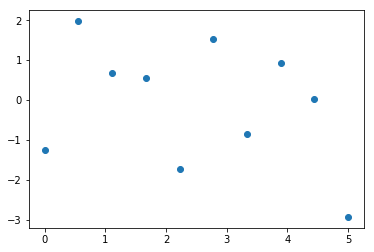

In [30]:
data = {
    'a': np.linspace(0, 5, 10),
    'b': np.random.randn(10)
}

_ = plt.scatter('a', 'b', data=data)

# Multiple plots and subplots

Matplotlib also allows us to plot multiple subplots in a single figure. In order to properly understand what is happening, it is useful to understand the way in which matplotlib figures are built.

**Figure**
The entire figure, think of it as a container of all elements of your plot. The figure keeps track of `axes` and several other special elements such as titles and legends. 

**Axes**
Axes are a common cause of confusion as it is not the plural of 'axis', but rather translates to an individual plot in the figure.

The Axes then contains everything we associated with a normal plot. 

![matplotlib_anatomy.png](images/matplotlib_anatomy.png)
(source: https://matplotlib.org/examples/showcase/anatomy.html)


If we then create multiple subplots, we in essence create multiple `axes` elements which we then fill with our preferred content.

The pyplot interface of matplotlib has the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes and gcf() returns the current figure.





at the start we have a figure: Figure(432x288)
but no axes: 0
After calling subplot, we suddenly have an axes 1
our current axes id is 4466224432
all plot commands after this will apply to this axes
After calling subplot again, we have 2 axes
our current axes id is 4466692672


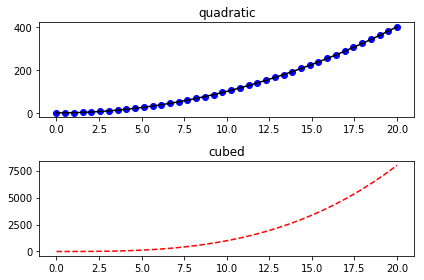

In [60]:
t = np.linspace(0, 20, 40)

plt.figure()
print(f'at the start we have a figure: {plt.gcf()}')
print(f'but no axes: {len(plt.gcf().axes)}')

plt.subplot(211)
print(f'After calling subplot, we suddenly have an axes {len(plt.gcf().axes)}')
print(f'our current axes id is {id(plt.gca())}')
print('all plot commands after this will apply to this axes')
plt.plot(t, t**2, 'bo', t, t**2, 'k')
plt.title('quadratic')

plt.subplot(212)
print(f'After calling subplot again, we have {len(plt.gcf().axes)} axes')
print(f'our current axes id is {id(plt.gca())}')
_ = plt.plot(t, t**3, 'r--')
plt.title('cubed')

plt.tight_layout()



So what does subplot actually do? It does nothing more than in our current figure, create and return an `axes` and set that axes as the current axes. Subsequent plotting commands will then refer to that new axes. The numbers in the call refer to the relative positioninhg 

In the current figure, create and return an Axes, at position index of a (virtual) grid of nrows by ncols axes. Indexes go from 1 to nrows * ncols, incrementing in row-major order.

## Object-oriented API

Apart from the state-based `plot` api, matplotlib also has an object-oriented api which allows for more flexible control of your plots. Using this api, we add some verbosity, as we will need to be explicit about what figure and axes we're referring to for each function.

The main way to create a figure with an Axes in the OO approach is (unintuitively) with `plt.subplots`

Text(0.5,1,'my first plot')

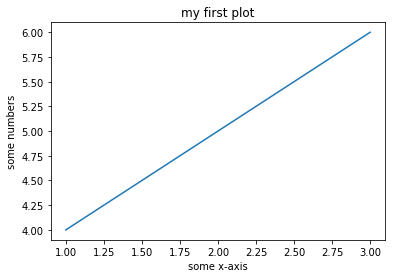

In [58]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3], [4, 5, 6])
ax.set_ylabel('some numbers')
ax.set_xlabel('some x-axis')
ax.set_title('my first plot')

We see that it is quite similar to our example earlier when we used the `plot` interface, but it is a bit more explicit. The same goes for our subplot example

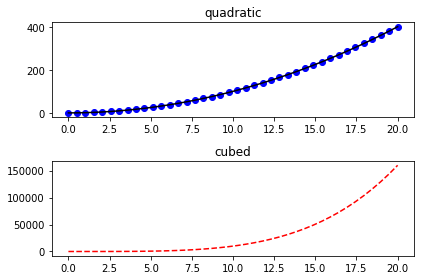

In [63]:
t = np.linspace(0, 20, 40)

fig, (ax_upper, ax_lower) = plt.subplots(2)

ax_upper.plot(t, t**2, 'bo', t, t**2, 'k')
ax_upper.set_title('quadratic')

ax_lower.plot(t, t**4, 'r--')
ax_lower.set_title('cubed')

fig.tight_layout()

## Gridspec

Using the [gridspec](https://matplotlib.org/api/gridspec_api.html) api we can further customize our suplots in matplotlib. 


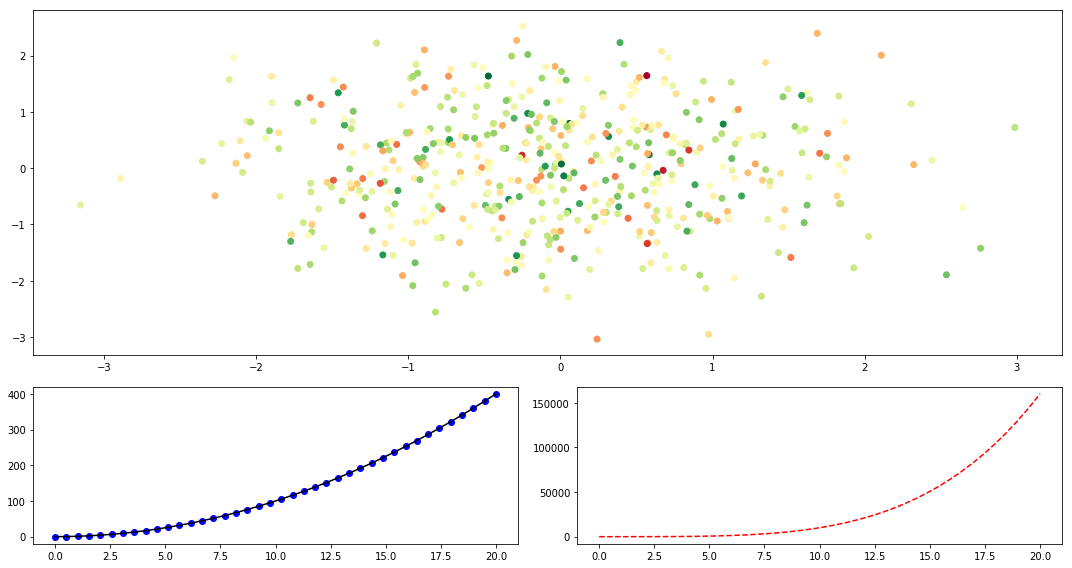

In [7]:
gridsize = (3, 2)
fig = plt.figure(figsize=(15, 8))
ax_upper = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax_bottomleft = plt.subplot2grid(gridsize, (2, 0))
ax_bottomright = plt.subplot2grid(gridsize, (2, 1))

ax_upper.scatter(np.random.randn(500), np.random.randn(500), c=np.random.randn(500), cmap='RdYlGn')

t = np.linspace(0, 20, 40)
ax_bottomleft.plot(t, t**2, 'bo', t, t**2, 'k')
ax_bottomright.plot(t, t**4, 'r--')

fig.tight_layout()

# Conclusion

Matplotlib is a powerful tool for plotting, but it is often not as intuitive as we want it to be. The library itself is massive and has several distinct interfaces for creating figures. 

Large parts of the matplotlib documentation are quite out-of-date as it is changing quite fast. This also means that many of the examples that we encounter online use old methods for constructing plots. Having some understanding of Matplotlibs foundations helps weeding out good examples from bad.